# Making regional curves with the Reference class

## About regional curves

Many restoration practitioners, regulators and academics look to unimpacted streams to inform their understanding of a what it means for an arbitrary stream to be "functioning". Evaluators collect information (such as bankfull width, depth, area and discharge) for a number of reference reaches and group the reaches together, often by EPA ecoregion. If enough reference reaches are evaluated, a curve of best fit (sometimes referred to as a "regional curve") can be made that relates the drainage area of a stream and an idea bankfull attribute. This curve is usually expected to follow the form $y = ax^b$, where $y$ is the drainage area and $x$ is an arbitrary bankfull attribute.

## Initializing Reference

The `Reference` class has just two arguments: `reaches` and `eco`. `reaches` is a pandas dataframe that, at the minimum, has a column of drainage areas (which *must* have 'drain' somewhere in its column name) and one more numeric column. Typically it should have columns for bankfull area, width, mean depth and discharge. `eco` is just an integer or string that indicates what area the `Reference` object will represent.

## EPA Ecoregion 71

Pyfluv includes a sample `Reference` object representing ecoregion 71, which covers most of middle Tennessee and is where the West Piney river mitigation project is. Like with `GrainDistributions`, pyfluv does not offer a bespoke class for importing reference data since it is simple enough to read in a csv. You can view the csv that pyfluv reads in for ecoregion 71 [here](https://github.com/rsjones94/pyfluv/blob/master/pyfluv/Data/eco71.csv). Many states issue reports on reference reaches; the data included in pyfluv was transcribed from a (TDEC report)[https://www.tn.gov/content/dam/tn/environment/water/documents/wr_wq_regional-curves-ecoregion711.pdf]. Note that TDEC has included their own regional curve equations. These may differ slightly from those generated by `Reference` objects due to differences in implementation.

In [10]:
import pyfluv

e71 = pyfluv.eco71()
e71.reaches

,Site,Stream name,Source/Location,Latitude,Longitude,Level IV Ecoregion,Drainage area,Channel slope,Bankfull area,Bankfull width,Bankfull mean depth,Width/depth ratio,Entrenchment Ratio,Sinuosity,Stream classification,Mannings n,Bankfull mean velocity,Bankfull discharge,100-year discharge,100-year floodplain shear stress
0,1,UT6 Little Swan Creek,Natchez Trace Parkway,35.522566,-87.451521,71f,0.02,0.0814,0.8,3.0,0.3,11.8,4.9,1.05,C4a,0.047,3.33,2.7,58.7,5.09
1,2,UT2 Little Swan Creek,Natchez Trace Parkway,35.519570,-87.456770,71f,0.03,0.0597,1.7,6.4,0.3,23.8,2.8,1.06,C4a,0.042,3.35,5.5,72.1,4.28
2,3,UT3 Little Swan Creek,Natchez Trace Parkway,35.512135,-87.455704,71f,0.04,0.0440,2.6,8.6,0.3,27.8,4.3,1.03,C4a,0.047,2.86,7.4,75.7,2.17
3,4,UT UT2 Woodhaven Lake,Montgomery Bell State Park,36.073430,-87.283140,71f,0.04,0.0108,2.3,4.2,0.5,7.8,13.1,1.05,E4,0.037,2.42,5.6,258.0,1.36
4,5,UT Little Buffalo River,Laurel Hill WMA,35.352084,-87.505361,71f,0.05,0.0419,3.0,5.5,0.5,10.1,3.7,1.02,E4a,0.042,4.32,13.0,97.5,3.45
5,6,UT7 Little Swan Creek,Natchez Trace Parkway,35.517061,-87.456661,71f,0.05,0.0623,1.4,5.5,0.3,22.3,4.4,1.08,C4a,0.042,3.35,4.7,117.0,5.01
6,7,UT5 Little Swan Creek,Natchez Trace Parkway,35.525536,-87.457892,71f,0.06,0.0406,3.8,4.9,0.8,6.2,2.7,1.13,E4a,0.042,5.01,19.0,112.0,5.26
7,8,UT4 Little Swan Creek,Natchez Trace Parkway,35.513963,-87.455846,71f,0.06,0.0714,1.7,5.7,0.3,19.0,2.3,1.01,B4a,0.042,3.89,6.4,116.0,7.40
8,9,UT UT1 Woodhaven Lake,Montgomery Bell State Park,36.076054,-87.275324,71f,0.10,0.0310,4.9,7.3,0.7,11.3,4.2,1.02,E4b,0.047,3.77,18.3,147.0,2.84
9,10,Ham Branch,Laurel Hill WMA,35.356584,-87.512692,71f,0.22,0.0166,10.3,12.0,0.9,14.0,4.2,1.03,C4,0.047,3.35,34.5,271.0,1.96


`Reference` objects have a `qplot()` method. The `col` parameter takes any valid column name in `reaches` that has numeric data.

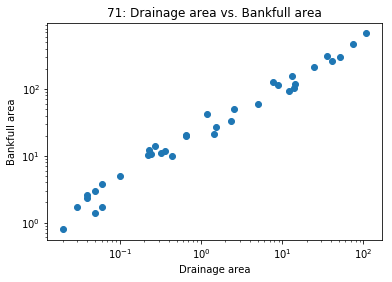

In [11]:
import matplotlib.pyplot as plt

plt.figure()
e71.qplot(col='Bankfull area')
# Reference is unit unaware, so it will label axes but does not include units

By default this plot is `'loglog'`, though the optional parameter `plotType` also takes `'semilogx'`, `'semilogy'` or `'linear'` as arguments.

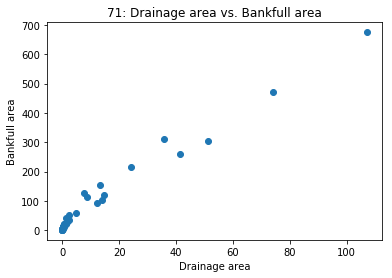

In [12]:
plt.figure()
e71.qplot(col='Bankfull area', plotType='linear')

The `fit()` method finds the best curve of the form $y = ax^b$ that relates drainage area to the data in a column, as well as the $R^2$ value of that fit.

In [13]:
coefs, r2 = e71.fit(col='Bankfull width')
a, b = coefs
a, b, r2

(20.057585033732472, 0.34620923773939904, 0.9453341461943929)

You can visualize the relationsip with `trend()`. Note that trend currently returns a very long list of values; this will removed in the next release of pyfluv and should be ignored.

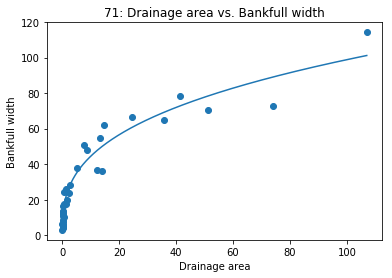

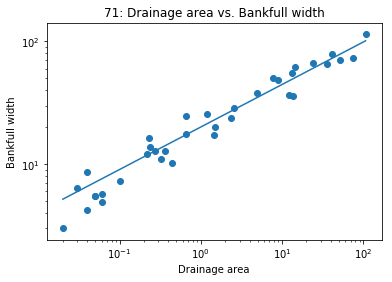

In [14]:
plt.figure()
e71.qplot('Bankfull width', plotType='linear')
y = e71.trend('Bankfull width')

plt.figure()
e71.qplot('Bankfull width', plotType='loglog')
y = e71.trend('Bankfull width')